<a href="https://colab.research.google.com/github/kieunseo/Hands-On-ML-Study/blob/main/%ED%95%B8%EC%A6%88%EC%98%A8_4%EC%9E%A5_%EB%AA%A8%EB%8D%B8%ED%9B%88%EB%A0%A8.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#math_linear_algebra

##2D vectors

In [ ]:
import numpy as np

In [ ]:
import matplotlib.pyplot as plt

In [ ]:
u = np.array([2, 5])
v = np.array([3, 1])

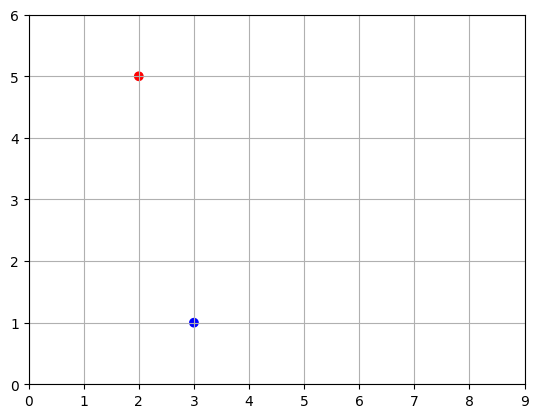

In [ ]:
x_coords, y_coords = zip(u, v)
plt.scatter(x_coords, y_coords, color=["r","b"])
plt.axis([0, 9, 0, 6])
plt.grid()
plt.show()

**options: 함수에 여러 개의 키워드 인수를 전달할 수 있게 해줌

In [ ]:
def plot_vector2d(vector2d, origin=[0,0], **options):
    return plt.arrow(origin[0], origin[1], vector2d[0], vector2d[1],
                     head_width=0.2, head_length=0.3, length_includes_head=True,
                     **options)


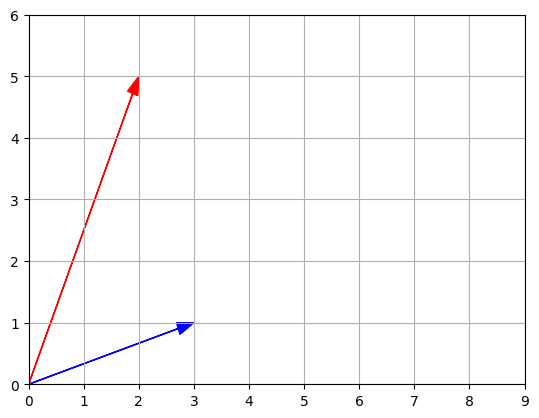

In [ ]:
plot_vector2d(u, color="r")
plot_vector2d(v, color="b")
plt.axis([0, 9, 0, 6])
plt.grid()
plt.show()

## 3D vectors

In [ ]:
a = np.array([1,2,8])
b = np.array([5,6,3])

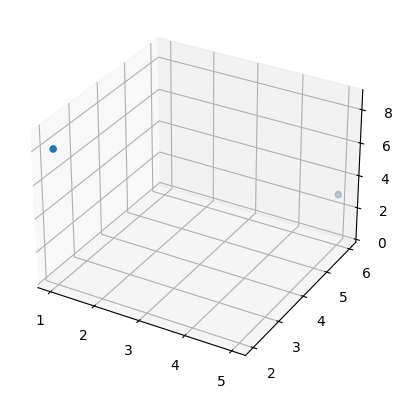

In [ ]:
subplot3d = plt.subplot(111, projection='3d')
x_coords, y_coords, z_coords = zip(a,b)
subplot3d.scatter(x_coords, y_coords, z_coords)
subplot3d.set_zlim3d([0, 9])
plt.show()

# 4장 모델 훈련

In [ ]:
import sys

assert sys.version_info >= (3, 7)

In [ ]:
from packaging import version
import sklearn

assert version.parse(sklearn.__version__) >= version.parse("1.0.1")

In [ ]:
import matplotlib.pyplot as plt

plt.rc('font', size=14)
plt.rc('axes', labelsize=14, titlesize=14)
plt.rc('legend', fontsize=14)
plt.rc('xtick', labelsize=10)
plt.rc('ytick', labelsize=10)

In [ ]:
from pathlib import Path

IMAGES_PATH = Path() / "images" / "training_linear_models"
IMAGES_PATH.mkdir(parents=True, exist_ok=True)

def save_fig(fig_id, tight_layout=True, fig_extension="png", resolution=300):
    path = IMAGES_PATH / f"{fig_id}.{fig_extension}"
    if tight_layout:
        plt.tight_layout()
    plt.savefig(path, format=fig_extension, dpi=resolution)

## 4.1 선형회귀

rand와 randn 차이

1. np.random.rand():
균등 분포(Uniform distribution)에서 난수를 생성합니다.

- 생성되는 난수는 0 이상 1 미만의 값들로 이루어집니다.

- 모든 값들이 같은 확률로 생성됩니다.



2. np.random.randn():
정규 분포(Normal distribution, 또는 Gaussian distribution)에서 난수를 생성합니다.

- 생성되는 난수는 평균이 0이고, 표준편차가 1인 정규 분포(표준 정규 분포)를 따릅니다.

- 값들은 정규 분포에 따라 0에 가까운 값이 많이 나오고, -1.0이나 1.0에 가까운 값은 상대적으로 적게 생성됩니다.


### 4.1.1 정규 방정식

In [ ]:
import numpy as np

np.random.seed(42)
m = 100
X = 2 * np.random.rand(m, 1) # 열 벡터
                             # m x 1 크기의 난수 벡터 생성
                             # 2를 곱하여 0과 2사이의 값을 생성

y = 4 + 3 * X + np.random.randn(m, 1) # 4 + 3 * X, X에 대한 선형 함수 표현
                                      # 4는 절편, 3은 기울기
                                      # 표준 정규 분포에서 추출된 난수를 m x 1 크기의 배열로 생성
                                      # 평균이 0이고 표준 편차가 1인 정규분포를 따름

In [ ]:
X [:10]

array([[0.74908024],
       [1.90142861],
       [1.46398788],
       [1.19731697],
       [0.31203728],
       [0.31198904],
       [0.11616722],
       [1.73235229],
       [1.20223002],
       [1.41614516]])

In [ ]:
y [:10]

array([[6.33428778],
       [9.40527849],
       [8.48372443],
       [5.60438199],
       [4.71643995],
       [5.29307969],
       [5.82639572],
       [8.67878666],
       [6.79819647],
       [7.74667842]])

정규 방정식을 사용해 **선형 회귀 모델의 파라미터
𝜃**를 구하는 방법

In [ ]:
from sklearn.preprocessing import add_dummy_feature

X_b = add_dummy_feature(X) # X에 1로 채워진 더미 특성을 추가한 결과
theta_best = np.linalg.inv(X_b.T @ X_b) @ X_b.T @ y # @ 행렬의 곱셈 연산자
                                                    # np.linalg.inv(): 행렬의 역행렬을 계산하는 NumPy 함수


샘플에 상수 값이 1이 추가되어 선형 회귀 모델에서 절편을 포함하는 형태로 데이터 사용 가능


**왜 더미 특성이 필요한가?**

𝜃0은 절편이다. 만약 데이터에 더미 특성이 없으면 절편을 추정할 수 없다. 절편을 포함하려면 상수 값이 필요.

In [ ]:
X_b[:5]

array([[1.        , 0.74908024],
       [1.        , 1.90142861],
       [1.        , 1.46398788],
       [1.        , 1.19731697],
       [1.        , 0.31203728]])

In [ ]:
theta_best

array([[4.21509616],
       [2.77011339]])

In [ ]:
A = 2,3
B = 3,5
np.matmul(A,B) # @와 같이 행렬 곱셈 수행

21

In [ ]:
X_new = np.array([[0], [2]]) # 0과 2로 이루어진 데이터 2x1 배열
X_new

array([[0],
       [2]])

In [ ]:
X_new_b = add_dummy_feature(X_new)
y_predict = X_new_b @ theta_best
y_predict

array([[4.21509616],
       [9.75532293]])

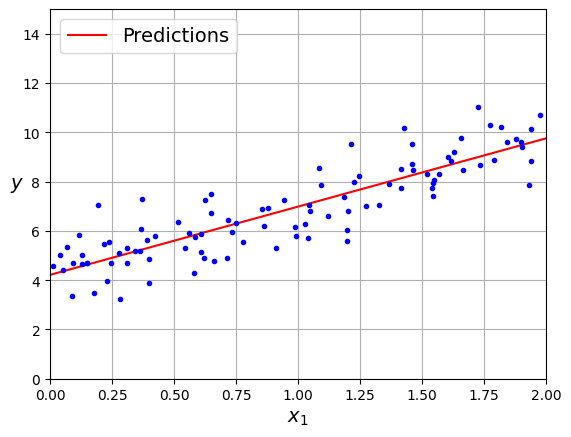

In [ ]:
plt.plot(X_new, y_predict, "r-", label="Predictions")
plt.plot(X, y, "b.")

plt.xlabel("$x_1$")
plt.ylabel("$y$", rotation=0)
plt.axis([0, 2, 0, 15])
plt.grid()
plt.legend(loc="upper left")

In [ ]:
from sklearn.linear_model import LinearRegression

lin_reg = LinearRegression() # 선형 회귀
lin_reg.fit(X, y)
lin_reg.intercept_, lin_reg.coef_

(array([4.21509616]), array([[2.77011339]]))

In [ ]:
lin_reg.predict(X_new)

array([[4.21509616],
       [9.75532293]])

최소 제곱법(least squares)으로 선형 회귀 모델의 최적 파라미터를 구하는 과정

SVD(Singular Value Decomposition)를 사용하여 선형 방정식의 해를 계산


---
SVD는 선형대수학에서 행렬을 분해하는 방법 중 하나로, 행렬을 세 개의 행렬의 곱으로 나타내는 기법

수학적 정의
특이값 분해는 다음과 같은 형태로 표현됩니다

출처: ChatGPT 4o

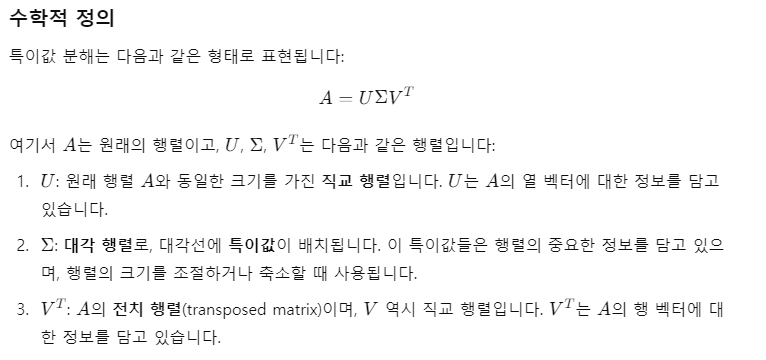

- 직교 행렬(Orthogonal Matrix): 열 벡터 또는 행 벡터들이 서로 직교하고 단위 벡터인 행렬. 역행렬이 전치 행렬과 같습니다.
- 대각 행렬(Diagonal Matrix): 주대각선에만 값이 있고, 나머지 요소는 모두 0인 행렬.
- 전치 행렬(Transpose Matrix)
: 행과 열을 뒤바꾼 행렬.

In [ ]:
theta_best_svd, residuals, rank, s = np.linalg.lstsq(X_b, y, rcond=1e-6)
theta_best_svd

array([[4.21509616],
       [2.77011339]])

> 의사역행렬(pseudoinverse)
>
> 정방행렬이 아니거나 역행렬이 존재하지 않는 경우에 행렬의 일종의 역행렬을 구하는 방법

*역행렬(inverse)은 정방행렬(행과 열의 수가 같은 행렬)에 대해서만 정의*

📌전통적인 방법으로는 구할 수 없다. 역행렬처럼 작동하는 것을 원할 때 의사역행렬을 사용함.


의사역행렬은 다음과 같은 상황에서 유용

1. 비정방행렬(행과 열의 개수가 다를 때)
2. 특이행렬(역행렬이 존재하지 않는 경우)
3. 선형 방정식 문제를 최소 제곱법으로 풀 때

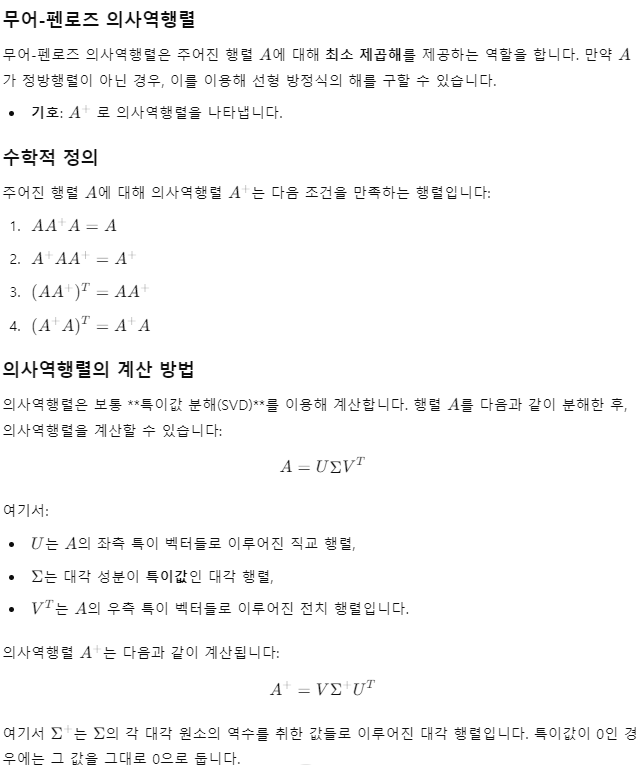

In [ ]:
np.linalg.pinv(X_b) @ y # pseudoinverse 계산

array([[4.21509616],
       [2.77011339]])

##  4.2 경사하강법

그레디언트: 함수의 변화율을 나타내는 벡터로, 함수가 가장 빠르게 증가하는 방향과 그 크기를 알려줌

경사하강법 그레디언트: 함수의 기울기, 함수가 가장 빠르게 증가하는 방향을 가르킴

👀🔎 이 그레디언트의 반대 방향으로 이동함으로써 함수의 최소값을 찾아감

✔️경사란 지형의 기울기 의미, 우리는 매 상황에서 경사가 가장 급한 방향으로 한 걸음씩 내딛는 과정을 반복

✔️local minimum(잘못된 최저점)에 빠질 수 있음, 각각 다른 출발점에서 시작하여 여러번 학습하는 방법을 취할 수 있음, 가중치의 초기값을 다르게 준다라는 것을 의미함.

➡️ 경사하강법이 찾아야 하는 제대로 된 최저점은 global minimum

경사하강법에서 미분

**오차는 가중치의 변화에 얼마나 민감한가?**

경사하강법
1. 초기화 (Initialization)

 임의의 값으로 𝜃를 초기화
2. 그레디언트 계산 (Compute Gradient)

 현재 파라미터에서 𝜃에서의 손실 함수의 그레디언트 계산
3. 업데이트 (Update)

    파라미터 𝜃를 그레디언트의 반대 방향으로 이동시킴

    학습률은 한 번의 업데이트에서 얼마나 이동할지를 결정

4. 반복 (Iteration)

    그레디언트 계산과 업데이트 과정을 반복하여 손실 함수가 더 이상 감소하지 않을 때까지 진행함

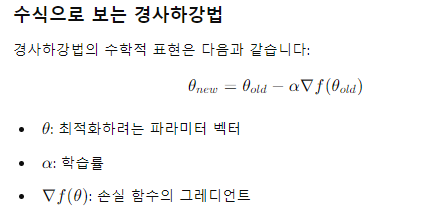

**에폭(Epoch)과 반복(Iteration)의 차이**

✏️ 에폭


- 전체 학습 데이터셋을 한 번 완전히 사용하는 과정
모델

✏️ 반복

- 한 번의 파라미터 업데이트를 수행하는 과정



### 4.2.1 배치경사하강법

매 스텝에서 훈련 데이터 전체를 사용

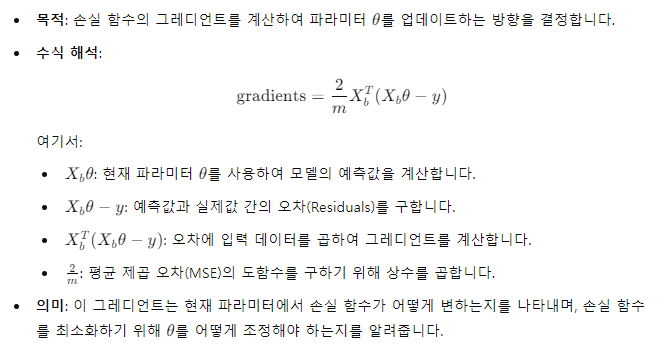

In [ ]:
eta = 0.1 # 학습률
n_epochs = 1000
m = len(X_b) # 샘플 개수, 데이터 포인트의 총 개수

np.random.seed(42)
theta = np.random.randn(2,1) # 모델 파라미터를 랜덤하게 초기화

for epoch in range(n_epochs):
    gradients = 2 / m * X_b.T @ (X_b @ theta - y)
    theta = theta - eta * gradients # 파리미터 업데이트
                                    # 그레디언트의 반대 방향으로 이동시켜 손실 함수를 최소화

In [ ]:
theta

array([[4.21509616],
       [2.77011339]])

### 4.2.2 확률적 경사 하강법

매 스텝에서 한 개의 샘플을 랜덤으로 선택하고 그 하나의 샘플에 대한 그레이디언트를 계산

In [ ]:
n_epochs = 50
t0, t1 = 5, 50 #학습 스케줄 하이퍼파라미터

def learning_schedule(t):
    return t0 / (t + t1)  # t0는 초기 학습률
                          # t1은 학습률이 감소하는 속도를 결정하는 상수
                          # 이 함수의 출력은 시간이 지남에 따라 학습률이 천천히 감소하는 것을 보여줄 것

np.random.seed(42)
theta = np.random.randn(2,1) # 랜덤 초기화
print(theta)

for epoch in range(n_epochs):
    for iteration in range(m): # m은 전체 훈련 샘플의 개수
        random_index = np.random.randint(m)
        xi = X_b[random_index : random_index + 1] # 랜덤 인덱스 무작위로 선택
        yi = y[random_index : random_index + 1]

        gradients = 2 * xi.T @ (xi @ theta - yi)
        # xi @ theta -> 행렬 곱셉(내적)을 통해 곱함, xi 예측
        # xi.T @ -> 오차에 대한 특징 벡터의 기울기 계산
        # MSE 비용 함수에서 기울기 계산할 때, 오차 제곱에 대한 기울기의 계수인 2가 곱해짐

        eta = learning_schedule(epoch * m + iteration)
        theta = theta - eta * gradients # gradients: 가중치에 대한 비용 함수의 기울기
                                        # 기울기가 크면 큰 변화가 필요하고, 작으면 적은 변화가 필요


[[ 0.49671415]
 [-0.1382643 ]]


In [ ]:
print(theta)

[[4.21076011]
 [2.74856079]]


y.ravel()을 사용해 1차원 배열로 변환하는 이유

타겟 값(정답 레이블)은 1차원 배열로 요구되기 때문


In [ ]:
from sklearn.linear_model import SGDRegressor

sgd_reg = SGDRegressor(max_iter=1000, tol=1e-5, penalty=None, eta0=0.01,
                      n_iter_no_change=100, random_state=42)
# 최대 반복 횟수 1000
# tol 수렴 조건 -> 비용 함수가 일정 수준 이하로 줄어들지 않으면 학습 멈춤
# penalty 정규화 사용 안함
# eta 초기 학습률
# n_iter_no_change=100 100번동안 변화가 없으면 학습 멈춤

sgd_reg.fit(X, y.ravel()) # y가 1차원 벡터로 변환되어 fit 함수로 들어옴

SGDRegressor(n_iter_no_change=100, penalty=None, random_state=42, tol=1e-05)

In [ ]:
sgd_reg.intercept_, sgd_reg.coef_

(array([4.21278812]), array([2.77270267]))

### 4.2.3 미니배치 경사 하강법

미니 배치라 부르는 임의의 작은 샘플 세트에 대해 그레디언트 계산

📌 미니배치는 전체 데이터셋을 여러 개의 작은 부분집합으로 나누어 학습에 사용하는 방법

In [ ]:
from math import ceil

n_epochs = 50
minibatch_size = 20
n_batches_per_epoch = ceil(m / minibatch_size) # m은 전체 데이터셋
                                               # ceil 올림 함수
# 100개의 샘플이 있음 -> 20개의 샘플씩 5번 학습하는 과정이 필요
# 한 에폭동안 20개의 미니 배치 사용

np.random.seed(42)
theta = np.random.randn(2,1)

t0, t1 = 200, 1000

def learning_schedule(t): # t 현재 반복의 수
    return t0 / (t + t1)  # 학습이 진행됨에 따라 t가 증가하므로 학습률은 점점 작아짐

theta_path_mgd = []

for epoch in range(n_epochs):
    shuffled_indices = np.random.permutation(m) # permutation 배열을 무작위로 섞은 거 반환
    X_b_shuffled = X_b[shuffled_indices]
    y_shuffled = y[shuffled_indices]
    for iteration in range(0, n_batches_per_epoch):
        idx = iteration * minibatch_size # 현재 몇번째 minibatch인지 나타냄
        xi = X_b_shuffled[idx : idx + minibatch_size]
        yi = y_shuffled[idx : idx + minibatch_size]
        gradients = 2 / minibatch_size * xi.T @ (xi @ theta - yi)
        eta = learning_schedule(iteration)
        theta = theta - eta * gradients

In [ ]:
m

100

In [ ]:
theta

array([[4.2857119],
       [2.8119161]])

## 4.3 다항 회귀

비선형 데이터를 학습하는데 선형 모델을 쓸 수 있다

🔎 각 특성의 거듭제곱을 새로운 특성으로 추가하고, 이 확장된 특성을 포함한 데이터셋에 선형 모델을 훈련시키는 것

In [ ]:
np.random.seed(42)
m = 100
X = 6 * np.random.rand(m, 1) - 3 # 2차 방정식에 약간의 잡음을 추가한 비선형 데이터 생성
y = 0.5 * X ** 2 + X + 2 + np.random.randn(m,1)

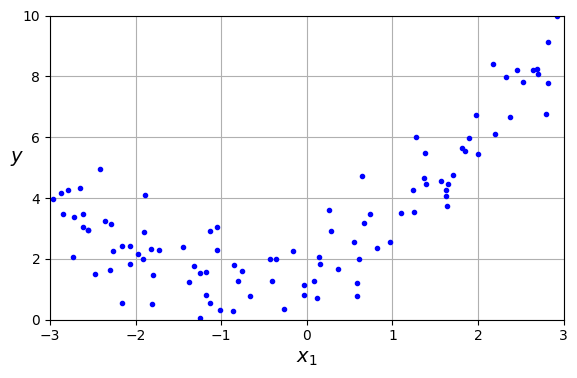

In [ ]:
plt.figure(figsize=(6,4))
plt.plot(X, y, "b.")
plt.xlabel("$x_1$")
plt.ylabel("$y$", rotation=0)
plt.axis([-3, 3, 0, 10])
plt.grid()
save_fig("quadratic_data_plot")
plt.show()

include_bias=False로 설정하면, 다항식 특성 변환 시 상수 항(1)을 생성하지 않음

왜 제외할까? 선형 회귀 모델과 같은 머신러닝 알고리즘은 절편을 자동으로 학습함

✔️ 다항식 변환에서 상수 항을 추가하면, 절편이 두 번 포함되는 결과를 초래할 수 있음

In [ ]:
from sklearn.preprocessing import PolynomialFeatures

poly_features = PolynomialFeatures(degree=2, include_bias=False)
# degree=2, 2차 다항식 사용
# include_bias=False, 상수항 제외 ->  다항식 특성 변환 시 상수 항(1)을 생성하지 않음

X_poly = poly_features.fit_transform(X)
# 선형 특성 외에도 제곱 항과 특성 간의 곱이 추가된 새로운 다항식 특성들이 생성

X[0]

array([-0.75275929])

In [ ]:
X_poly[0]

array([-0.75275929,  0.56664654])

In [ ]:
poly_features.get_feature_names_out() # 만들어진 특성의 차수 확인

array(['x0', 'x0^2'], dtype=object)

In [ ]:
lin_reg = LinearRegression()
lin_reg.fit(X_poly, y)
lin_reg.intercept_, lin_reg.coef_ # 절편, 가중치

(array([1.78134581]), array([[0.93366893, 0.56456263]]))

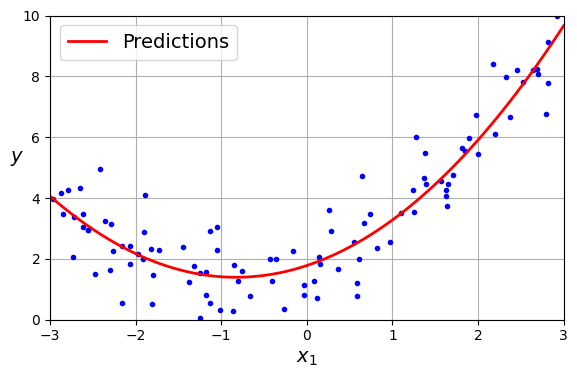

In [ ]:
X_new = np.linspace(-3, 3, 100).reshape(100, 1)
X_new_poly = poly_features.transform(X_new)
y_new = lin_reg.predict(X_new_poly)

plt.figure(figsize=(6, 4))
plt.plot(X, y, "b.")
plt.plot(X_new, y_new, "r-", linewidth=2, label="Predictions")
plt.xlabel("$x_1$")
plt.ylabel("$y$", rotation=0)
plt.legend(loc="upper left")
plt.axis([-3, 3, 0, 10])
plt.grid()
save_fig("quadratic_predictions_plot")
plt.show()

## 4.4 학습 곡선

모델의 훈련 오차와 검증 오차를 훈련 반복 횟수의 함수로 나타낸 그래프

> partial_fit과 warm_start 점진적 학습이나 온라인 학습을 가능하게 해주는 기능

- partial_fit

    - 모델을 학습할 때 한 번에 전체 데이터를 모두 학습하지 않고, 데이터를 여러 번에 나누어 학습할 수 있는 메서드

- warm_start
    
    - 모델을 새로 학습할 때, 이전에 학습한 결과를 초기값으로 사용하여 이어서 학습하는 기능
    - 모델의 학습 결과를 유지한 채 추가 데이터를 이용해 모델을 업데이트할 수 있음


(0.0, 80.0, 0.0, 2.5)

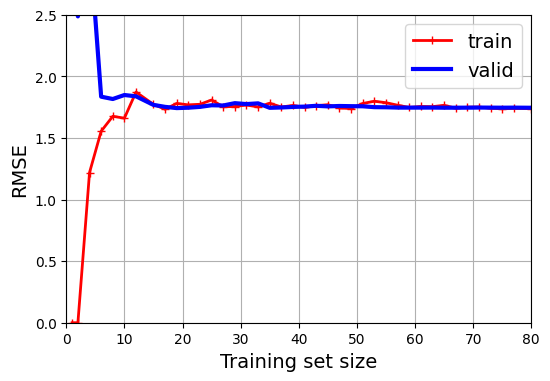

In [ ]:
from sklearn.model_selection import learning_curve

train_sizes, train_scores, valid_scores = learning_curve(
    LinearRegression(), X, y, train_sizes=np.linspace(0.01, 1.0, 40), cv=5,
    scoring='neg_root_mean_squared_error')
# np.linspace(0.01, 1.0, 40), 훈련 세트 크기를 1%에서 100%까지, 총 40번에 걸쳐 나누어 학습하는 것

train_errors = -train_scores.mean(axis=1) # 양수의 RMSE 값으로 변환하기 위해 부호를 반대로 변환
valid_errors = -valid_scores.mean(axis=1)

plt.figure(figsize=(6, 4))
plt.plot(train_sizes, train_errors, "r-+", linewidth=2, label="train")
plt.plot(train_sizes, valid_errors, "b-", linewidth=3, label="valid")

plt.xlabel("Training set size")
plt.ylabel("RMSE")
plt.grid()
plt.legend(loc="upper right")
plt.axis([0, 80, 0, 2.5])

평가 지표 RMSE 사용

neg가 붙은 이유는 learning_curve 함수는 높은 점수를 좋게 평가하기 때문에, 손실 함수로 사용하기 위해 RMSE를 음수로 변환하여 처리

그래프 해석 (과소적합)
- 훈련 세트에 샘플이 추가됨에 따라 잡음도 있고 비선형이기 때문에 모델이 훈련 데이터를 완벽히 학습하는 것은 불가능
- 곡선이 어느 정도 평편해질 때까지 오차가 계속 상승

In [ ]:
from sklearn.pipeline import make_pipeline

polynomial_regression = make_pipeline(
    PolynomialFeatures(degree=10, include_bias=False),
    LinearRegression())

tranin_sizes, train_scores, valid_scores = learning_curve(
    polynomial_regression, X, y, train_sizes=np.linspace(0.01, 1.0, 40), cv=5,
    scoring="neg_root_mean_squared_error")

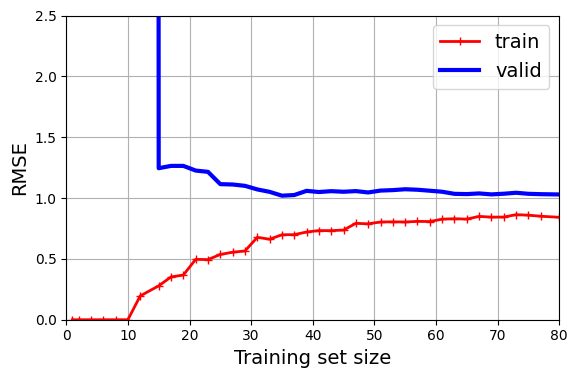

In [ ]:
train_errors = -train_scores.mean(axis=1)
valid_errors = -valid_scores.mean(axis=1)

plt.figure(figsize=(6, 4))
plt.plot(train_sizes, train_errors, "r-+", linewidth=2, label="train")
plt.plot(train_sizes, valid_errors, "b-", linewidth=3, label="valid")
plt.legend(loc="upper right")
plt.xlabel("Training set size")
plt.ylabel("RMSE")
plt.grid()
plt.axis([0, 80, 0, 2.5])
save_fig("learning_curves_plot")
plt.show()

이전과 차이점

- 오차가 이전보다 훨씬 낮음
- 두 곡선 사이에 공간이 있다. 훈련 데이터에서 모델이 더 나은 성능이 보여짐 -> 과대적합 모델 특징
- 더 큰 훈련 세트를 사용하면 곡선이 가까워지고 있음

## 4.5 규제가 있는 선형 모델

과대적합을 줄이는 좋은 방법은 모델을 규제(제한)하는 것 ➡️ 자유도를 줄인다

1. 다항회귀 모델 규제
    - 다항식 차수를 줄인다
2. 선형회귀 모델 규제
    - 모델의 가중치 제한


<img src="https://velog.velcdn.com/images%2Fhyesukim1%2Fpost%2F1b5459d5-0965-474d-b4b7-b83c04c94987%2Fimage.png" width="600" height="300">


### 4.5.1 릿지 회귀

In [ ]:
np.random.seed(42)
m = 20
X = 3 * np.random.rand(m, 1)
y = 1 + 0.5 * X + np.random.randn(m,1) / 1.5
X_new = np.linspace(0,3,100).reshape(100,1)

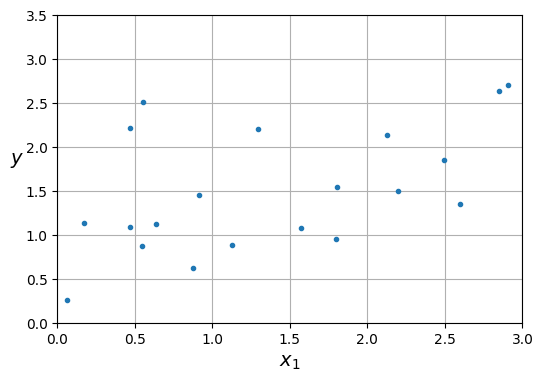

In [ ]:
plt.figure(figsize=(6, 4))
plt.plot(X, y, ".")
plt.xlabel("$x_1$")
plt.ylabel("$y$  ", rotation=0)
plt.axis([0, 3, 0, 3.5])
plt.grid()
plt.show()

In [ ]:
from sklearn.linear_model import Ridge

ridge_reg = Ridge(alpha=0.1, solver="cholesky") # alpha=0.1 정규화 강도
ridge_reg.fit(X,y)
ridge_reg.predict([[1.5]]) # 2차원 배열 전달

array([[1.55325833]])

In [ ]:
sgd_reg = SGDRegressor(penalty="l2", alpha=0.1 / m, tol=None,
                       max_iter=1000, eta0=0.01, random_state=42)
sgd_reg.fit(X, y.ravel())
sgd_reg.predict([[1.5]]) #새로운 입력데이터로 예측 수행

array([1.55302613])

In [ ]:
ridge_reg = Ridge(alpha=0.1, solver='sag', random_state=42)
ridge_reg.fit(X, y)
ridge_reg.predict([[1.5]])

array([[1.55326019]])

### 4.5.2 라쏘 회귀

L1 정규화는 모델의 가중치에 절댓값의 합을 추가하는 방식

덜 중요한 특성의 가중치를 제거하려 함, 가중치가 0

희소 모델을 만들음 -> 모델의 가중치 중 상당수가 0이 되는 모델

In [ ]:
from sklearn.linear_model import Lasso

lasso_reg = Lasso(alpha=0.1) # alpha=0.1은 규제 강도(λ)
                             # 규제 강도가 클수록 더 많은 변수의 가중치를 0으로 만들 가능성이 커짐
lasso_reg.fit(X,y)
lasso_reg.predict([[1.5]])

array([1.53788174])

### 4.5.3 엘라스틱넷

릿지 회귀와 라쏘 회귀를 절충한 모델

변수 선택과 과적합 방지를 동시에 수행

In [ ]:
from sklearn.linear_model import ElasticNet

elastic_net = ElasticNet(alpha=0.1, l1_ratio=0.5)
# l1_ratio=0.5: L1 규제(Lasso)와 L2 규제(Ridge)간의 비율을 조절하는 매개변수

elastic_net.fit(X,y)
elastic_net.predict([[1.5]])

array([1.54333232])

### 4.5.4 조기종료

In [ ]:
from copy import deepcopy
from sklearn.metrics import root_mean_squared_error
from sklearn.preprocessing import StandardScaler

np.random.seed(42)
m = 100
X = 6 * np.random.rand(m, 1) - 3
y = 0.5 * X ** 2 + X + 2 + np.random.randn(m, 1)
X_train, y_train = X[: m // 2], y[: m // 2, 0]
X_valid, y_valid = X[m // 2 :], y[m // 2 :, 0]

preprocessing = make_pipeline(PolynomialFeatures(degree=90, include_bias=False),
                              StandardScaler())
X_train_prep = preprocessing.fit_transform(X_train)
X_valid_prep = preprocessing.transform(X_valid) # 일관된 변환을 하기 위해 transform만 호출
sgd_reg = SGDRegressor(penalty=None, eta0=0.002, random_state=42)

n_epochs = 500
best_valid_rmse = float('inf') # 초기값 무한대 설정

for epoch in range(n_epochs):
    sgd_reg.partial_fit(X_train_prep, y_train)
    y_valid_predict = sgd_reg.predict(X_valid_prep)
    val_error = root_mean_squared_error(y_valid, y_valid_predict)
    if val_error < best_valid_rmse:
        best_valid_rmse = val_error
        best_model = deepcopy(sgd_reg)

In [ ]:
best_model

SGDRegressor(eta0=0.002, penalty=None, random_state=42)

In [ ]:
best_valid_rmse

1.4099344710854789

## 4.6 로지스틱 회귀


로지스틱 회귀는 선형 회귀처럼 가중치(weight)와 입력 특성의 선형 결합을 계산하지만, 그 결합값을 확률로 변환하기 위해 **비선형 변환(시그모이드 함수)**을 사용하여 분류 작업 수행
➡️ 이 때문에 "회귀"라는 이름이 붙었지만, 실제로는 분류 알고리즘

시그모이드 함수를 사용하여 선형 회귀의 결과를 확률 값으로 변환하고, 그 확률을 기반으로 분류를 수행

<img src="https://velog.velcdn.com/images/73syjs/post/9ece82c2-0abb-4379-b0a7-74ed203eaf8d/image.png" width="500" height="300">


### 4.6.3 결정 경계

In [ ]:
from sklearn.datasets import load_iris

iris = load_iris(as_frame=True) # 판다스 형식으로 불러옴
list(iris)

['data',
 'target',
 'frame',
 'target_names',
 'DESCR',
 'feature_names',
 'filename',
 'data_module']

In [ ]:
print(iris.DESCR) # 데이터셋 설명 출력
                  #  데이터셋의 구조, 특성, 출처 등에 대한 정보를 제공

.. _iris_dataset:

Iris plants dataset
--------------------

**Data Set Characteristics:**

:Number of Instances: 150 (50 in each of three classes)
:Number of Attributes: 4 numeric, predictive attributes and the class
:Attribute Information:
    - sepal length in cm
    - sepal width in cm
    - petal length in cm
    - petal width in cm
    - class:
            - Iris-Setosa
            - Iris-Versicolour
            - Iris-Virginica

:Summary Statistics:

============== ==== ==== ======= ===== ====================
                Min  Max   Mean    SD   Class Correlation
============== ==== ==== ======= ===== ====================
sepal length:   4.3  7.9   5.84   0.83    0.7826
sepal width:    2.0  4.4   3.05   0.43   -0.4194
petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)
petal width:    0.1  2.5   1.20   0.76    0.9565  (high!)
============== ==== ==== ======= ===== ====================

:Missing Attribute Values: None
:Class Distribution: 33.3% for each of 3 classes.
:Cr

In [ ]:
iris.data.head(3)

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2


In [ ]:
iris.target.head(3)

,target
0,0
1,0
2,0


In [ ]:
iris.target_names

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

X = iris.data[['petal width (cm)']].values
y = iris.target_names[iris.target] == 'virginica'
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

log_reg = LogisticRegression(random_state=42)
log_reg.fit(X_train, y_train)

LogisticRegression(random_state=42)

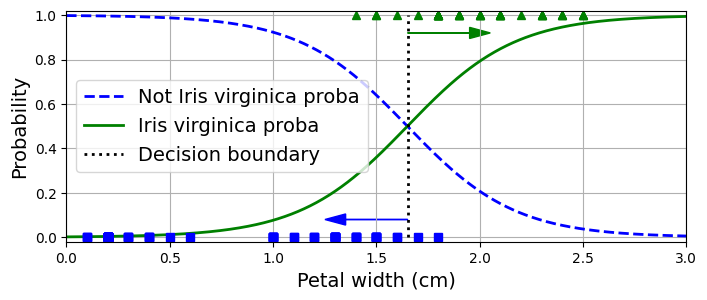

In [ ]:
X_new = np.linspace(0,3,1000).reshape(-1,1) # 새로운 입력값 -> 0~3 사이의 값 1,000개 생성
y_proba = log_reg.predict_proba(X_new)
decision_boundary = X_new[y_proba[:,1] >= 0.5][0,0]

plt.figure(figsize=(8, 3))  # 추가 코드
plt.plot(X_new, y_proba[:, 0], "b--", linewidth=2,
         label="Not Iris virginica proba")
plt.plot(X_new, y_proba[:, 1], "g-", linewidth=2, label="Iris virginica proba")
plt.plot([decision_boundary, decision_boundary], [0, 1], "k:", linewidth=2,
         label="Decision boundary")

plt.arrow(x=decision_boundary, y=0.08, dx=-0.3, dy=0,
          head_width=0.05, head_length=0.1, fc="b", ec="b")
plt.arrow(x=decision_boundary, y=0.92, dx=0.3, dy=0,
          head_width=0.05, head_length=0.1, fc="g", ec="g")
plt.plot(X_train[y_train == 0], y_train[y_train == 0], "bs")
plt.plot(X_train[y_train == 1], y_train[y_train == 1], "g^")
plt.xlabel("Petal width (cm)")
plt.ylabel("Probability")
plt.legend(loc="center left")
plt.axis([0, 3, -0.02, 1.02])
plt.grid()

plt.show()

In [ ]:
X_new[:5]

array([[0.        ],
       [0.003003  ],
       [0.00600601],
       [0.00900901],
       [0.01201201]])

In [ ]:
y_proba[:5]

array([[0.99820801, 0.00179199],
       [0.99818732, 0.00181268],
       [0.99816638, 0.00183362],
       [0.99814521, 0.00185479],
       [0.99812379, 0.00187621]])

In [ ]:
decision_boundary

1.6516516516516517

In [ ]:
log_reg.predict([[1.7], [1.5]])

array([ True, False])

### 4.6.4 소프트맥스 회귀

다항 로지스틱 회귀

In [ ]:
X = iris.data[["petal length (cm)", "petal width (cm)"]].values
y = iris["target"]
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

softmax_reg = LogisticRegression(C=30, random_state=42)
softmax_reg.fit(X_train, y_train)

LogisticRegression(C=30, random_state=42)

In [ ]:
softmax_reg.predict([[5,2]])

array([2])

In [ ]:
softmax_reg.predict_proba([[5,2]]).round(2)

array([[0.  , 0.04, 0.96]])

## 연습문제



12. 조기 종료를 사용한 배치 경사 하강법으로 소프트맥스 회귀 구현하기

 문제: 사이킷런을 사용하지 않고 넘파이만으로 조기 종료를 사용한 배치 경사 하강법으로 소프트맥스 회귀를 구현해 보세요. 이를 붓꽃 데이터셋과 같은 분류 작업에 사용해 보세요.

In [ ]:
# 데이터 로드
X = iris.data[["petal length (cm)", "petal width (cm)"]].values
y = iris["target"].values

사이킷런의 add_dummy_feature() 함수 대체

In [ ]:
X_with_bias = np.c_[np.ones(len(X)), X]
# X의 길이만큼 1로 이루어진 배열을 생성, 이 배열은 편향 항

사이킷런의 train_test_split() 함수 대체

In [ ]:
test_ratio = 0.2
validation_ratio = 0.2
total_size = len(X_with_bias)

test_size = int(total_size * test_ratio)
validation_size = int(total_size * validation_ratio)
train_size = total_size - test_size - validation_size

np.random.seed(42)
rnd_indices = np.random.permutation(total_size)

X_train = X_with_bias[rnd_indices[:train_size]]
y_train = y[rnd_indices[:train_size]]
X_valid = X_with_bias[rnd_indices[train_size:-test_size]]
y_valid = y[rnd_indices[train_size:-test_size]]
X_test = X_with_bias[rnd_indices[-test_size:]]
y_test = y[rnd_indices[-test_size:]]

In [ ]:
y

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [ ]:
def to_one_hot(y): # 원핫 인코딩 함수
    return np.diag(np.ones(y.max() + 1))[y] # np.diag 대각 행렬 생성

In [ ]:
y_train[:10]

array([1, 0, 2, 1, 1, 0, 1, 2, 1, 1])

In [ ]:
to_one_hot(y_train[:10])

array([[0., 1., 0.],
       [1., 0., 0.],
       [0., 0., 1.],
       [0., 1., 0.],
       [0., 1., 0.],
       [1., 0., 0.],
       [0., 1., 0.],
       [0., 0., 1.],
       [0., 1., 0.],
       [0., 1., 0.]])

In [ ]:
Y_train_one_hot = to_one_hot(y_train)
Y_valid_one_hot = to_one_hot(y_valid)
Y_test_one_hot = to_one_hot(y_test)

입력 스케일 조정

1️⃣ 훈련 세트에서 (편향은 제외한) 각 특성의 평균과 표준 편차를 계산

 2️⃣ 훈련 세트, 검증 세트 및 테스트 세트에서 각 특성을 중앙에 맞추고 스케일을 조정

In [ ]:
mean = X_train[:, 1:].mean(axis=0) # 첫번째 열 편향 향 제외
std = X_train[:, 1:].std(axis=0)

X_train[:, 1:] = (X_train[:, 1:] - mean) / std
X_valid[:, 1:] = (X_valid[:, 1:] - mean) / std
X_test[:, 1:] = (X_test[:, 1:] - mean) / std

소프트 맥스 함수 구현

$\sigma\left(\mathbf{s}(\mathbf{x})\right)_k = \dfrac{\exp\left(s_k(\mathbf{x})\right)}{\sum\limits_{j=1}^{K}{\exp\left(s_j(\mathbf{x})\right)}}$

In [ ]:
def softmax(logits):
    exps = np.exp(logits) # 지수 함수 적용
    exp_sums = exps.sum(axis=1, keepdims=True) # 각 행, 각 샘플마다 지수 값의 합을 구함
                                               # 2차원 배열로 유지
    return exps / exp_sums # 클래스에 속할 확률이 계산

In [ ]:
n_inputs = X_train.shape[1] # == 3 (2개의 특성과 편향)
n_outputs = len(np.unique(y_train)) # == 3 (3개의 붓꽃 클래스)
                                    # np.unique() 함수는 데이터에서 중복을 제거하고 고유한 값만 반환

In [ ]:
X_train

array([[ 1.        ,  0.63935691,  0.10418645],
       [ 1.        , -1.04480275, -1.06791114],
       [ 1.        ,  1.87440733,  1.53675017],
       [ 1.        ,  0.5270796 ,  0.49488565],
       [ 1.        ,  0.69549556,  0.36465258],
       [ 1.        , -1.15708007, -0.93767807],
       [ 1.        ,  0.0218317 ,  0.23441952],
       [ 1.        ,  0.86391153,  1.53675017],
       [ 1.        ,  0.5270796 ,  0.49488565],
       [ 1.        ,  0.19024767,  0.10418645],
       [ 1.        ,  0.86391153,  1.14605097],
       [ 1.        , -1.21321872, -1.32837727],
       [ 1.        , -1.26935738, -1.1981442 ],
       [ 1.        , -1.15708007, -1.32837727],
       [ 1.        , -1.15708007, -1.06791114],
       [ 1.        ,  0.63935691,  0.62511871],
       [ 1.        ,  1.25688212,  1.4065171 ],
       [ 1.        ,  0.19024767, -0.02604661],
       [ 1.        ,  0.5270796 ,  0.23441952],
       [ 1.        ,  1.14460481,  1.4065171 ],
       [ 1.        , -1.10094141, -1.198

In [ ]:
y_train

array([1, 0, 2, 1, 1, 0, 1, 2, 1, 1, 2, 0, 0, 0, 0, 1, 2, 1, 1, 2, 0, 2,
       0, 2, 2, 2, 2, 2, 0, 0, 0, 0, 1, 0, 0, 2, 1, 0, 0, 0, 2, 1, 1, 0,
       0, 1, 2, 2, 1, 2, 1, 2, 1, 0, 2, 1, 0, 0, 0, 1, 2, 0, 0, 0, 1, 0,
       1, 2, 0, 1, 2, 0, 2, 2, 1, 1, 2, 1, 0, 1, 2, 0, 0, 1, 1, 0, 2, 0,
       0, 1])

In [ ]:
X_train.shape

(90, 3)

In [ ]:
np.unique(y_train)

array([0, 1, 2])

In [ ]:
m

90

In [ ]:
eta = 0.5
n_epochs = 5001
m = len(X_train)
epsilon = 1e-5

np.random.seed(42)
Theta = np.random.randn(n_inputs, n_outputs)

for epoch in range(n_epochs):
    logits = X_train @ Theta #  선형 조합의 결과
    #X: 입력 데이터 행렬 (특징 벡터)
    #Theta: 모델의 가중치 행렬
    #logits: 각 샘플에 대해 모델이 예측한 값(점수)

    Y_proba = softmax(logits)
    if epoch % 1000 == 0:
        Y_proba_valid = softmax(X_valid @ Theta) # 일반화 확인
        xentropy_losses = -(Y_valid_one_hot * np.log(Y_proba_valid + epsilon))
        print(epoch, xentropy_losses.sum(axis=1).mean())
    error = Y_proba - Y_train_one_hot
    gradients = 1 / m * X_train.T @ error
    Theta = Theta - eta * gradients


0 3.7085808486476917
1000 0.14519367480830644
2000 0.1301309575504088
3000 0.12009639326384539
4000 0.11372961364786884
5000 0.11002459532472425


In [ ]:
Theta

array([[ 0.41931626,  6.11112089, -5.52429876],
       [-6.53054533, -0.74608616,  8.33137102],
       [-5.28115784,  0.25152675,  6.90680425]])

In [ ]:
logits = X_valid @ Theta
Y_proba = softmax(logits)
y_predict = Y_proba.argmax(axis=1)

accuracy_score = (y_predict == y_valid).mean()
accuracy_score

0.9333333333333333

In [ ]:
eta = 0.5
n_epochs = 5001
m = len(X_train)
epsilon = 1e-5
alpha = 0.01

np.random.seed(42)
Theta = np.random.randn(n_inputs, n_outputs)

for epoch in range(n_epochs):
    logits = X_train @ Theta
    Y_proba = softmax(logits)
    if epoch % 1000 == 0:
        Y_proba_valid = softmax(X_valid @ Theta)
        xentropy_losses = -(Y_valid_one_hot * np.log(Y_proba_valid + epsilon))
        l2_loss = 1 / 2 * (Theta[1:] ** 2).sum()
        total_loss= xentropy_losses.sum(axis=1).mean() + alpha * l2_loss
        print(epoch, total_loss.round(4))
    error = Y_proba - Y_train_one_hot
    gradients = 1 / m * X_train.T @ error
    gradients += np.r_[np.zeros([1, n_outputs]), alpha * Theta[1:]]
    # Theta[1:]는 편향(bias) 항목을 제외한 가중치

    Theta = Theta - eta * gradients

0 3.7372
1000 0.3259
2000 0.3259
3000 0.3259
4000 0.3259
5000 0.3259


In [ ]:
logits = X_valid @ Theta
Y_proba = softmax(logits)
y_predict = Y_proba.argmax(axis=1)

accuracy_score = (y_predict == y_valid).mean()
accuracy_score

0.9333333333333333

In [ ]:
eta = 0.5
n_epochs = 50_001
m = len(X_train)
epsilon = 1e-5
c = 100 # 조기 종료 조건
best_loss = np.infty # 가장 낮은 손실 저장

np.random.seed(42)
Theta = np.random.randn(n_inputs, n_outputs)

for epoch in range(n_epochs):
    logits = X_train @ Theta
    Y_proba = softmax(logits)
    Y_proba_valid = softmax(X_valid @ Theta)
    xentropy_losses = -(Y_valid_one_hot * np.log(Y_proba_valid + epsilon))
    l2_loss = 1 / 2 * (Theta[1:] ** 2).sum()
    total_loss = xentropy_losses.sum(axis=1).mean() + 1 / c * l2_loss
    if epoch % 1000 == 0:
        print(epoch, total_loss.round(4))
    if total_loss < best_loss:
        best_loss = total_loss
    else:
        print(epoch - 1, best_loss.round(4)) # 바로 직전 에포크
        print(epoch, total_loss.round(4), "조기 종료!")
        break
    error = Y_proba - Y_train_one_hot
    gradients = 1 / m * X_train.T @ error
    gradients += np.r_[np.zeros([1, n_outputs]), 1 / C * Theta[1:]]
    Theta = Theta - eta * gradients

0 3.7372
281 0.3256
282 0.3256 조기 종료!


In [ ]:
logits = X_valid @ Theta
Y_proba = softmax(logits)
y_predict = Y_proba.argmax(axis=1)

accuracy_score = (y_predict == y_valid).mean()
accuracy_score

0.9333333333333333

In [ ]:
logits = X_test @ Theta
Y_proba = softmax(logits)
y_predict = Y_proba.argmax(axis=1)

accuracy_score = (y_predict == y_test).mean()
accuracy_score

0.9666666666666667